## Moving Averages Trading Strategy

The MA Trading Strategy.ipynb file presents a comprehensive approach to implementing a Moving Average (MA) trading strategy. This strategy uses two different moving averages, typically a short-term and a long-term moving average, to generate buy and sell signals based on their crossover points. The goal is to capitalize on trends in financial markets by entering and exiting positions at optimal times.

### Import Libraries

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1. Munging the stock data and add two columns - MA10 and MA50

In [24]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
start_date = '2015-01-01'
end_date = '2018-01-01'
ticker = 'META'

fb = yf.download(ticker, start=start_date, end=end_date)

fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-16,77.959999,78.120003,77.360001,78.070000,77.987251,19305400,79.133001,77.3516
2015-03-17,78.360001,79.779999,78.339996,79.360001,79.275887,22170000,79.109001,77.3698
2015-03-18,79.250000,81.239998,79.169998,80.910004,80.824249,36912400,79.110001,77.4442
2015-03-19,81.120003,83.000000,81.000000,82.750000,82.662292,42099500,79.264001,77.5762
2015-03-20,83.389999,84.599998,83.070000,83.800003,83.711182,44466300,79.643002,77.7292
...,...,...,...,...,...,...,...,...
2017-12-22,177.139999,177.529999,176.229996,177.199997,177.012192,8509500,178.573999,177.7204
2017-12-26,176.630005,177.000000,174.669998,175.990005,175.803482,8897300,178.269000,177.7654
2017-12-27,176.550003,178.440002,176.259995,177.619995,177.431732,9496100,178.334999,177.8274


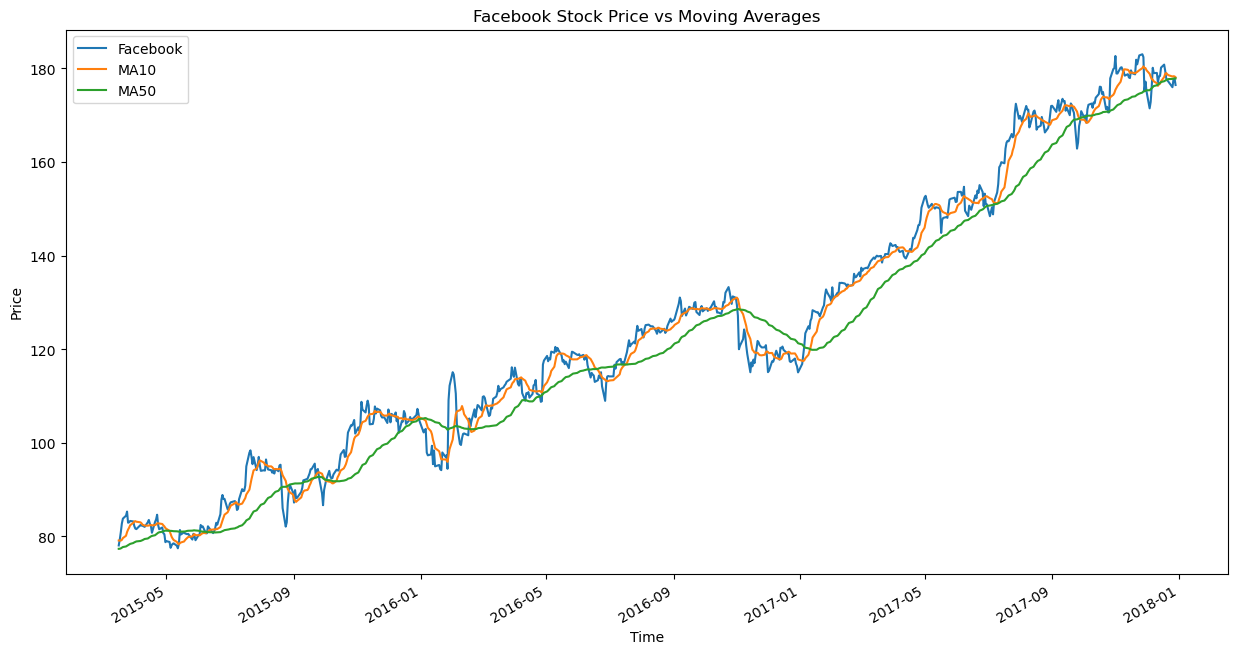

In [25]:
plt.figure(figsize=(15,8))
fb['Close'].plot(label='Facebook')
fb['MA10'].plot(label='MA10')
fb['MA50'].plot(label='MA50')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Facebook Stock Price vs Moving Averages')
plt.legend()
plt.show()

### 2. Add "Shares" column to make decisions based on the strategy 

In [26]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
fb['Shares'] = [1 if fb['MA10'].loc[i] > fb['MA50'].loc[i] else 0 for i in fb.index]
fb

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2015-03-16,77.959999,78.120003,77.360001,78.070000,77.987251,19305400,79.133001,77.3516,1
2015-03-17,78.360001,79.779999,78.339996,79.360001,79.275887,22170000,79.109001,77.3698,1
2015-03-18,79.250000,81.239998,79.169998,80.910004,80.824249,36912400,79.110001,77.4442,1
2015-03-19,81.120003,83.000000,81.000000,82.750000,82.662292,42099500,79.264001,77.5762,1
2015-03-20,83.389999,84.599998,83.070000,83.800003,83.711182,44466300,79.643002,77.7292,1
...,...,...,...,...,...,...,...,...,...
2017-12-22,177.139999,177.529999,176.229996,177.199997,177.012192,8509500,178.573999,177.7204,1
2017-12-26,176.630005,177.000000,174.669998,175.990005,175.803482,8897300,178.269000,177.7654,1
2017-12-27,176.550003,178.440002,176.259995,177.619995,177.431732,9496100,178.334999,177.8274,1


In [27]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.
fb['Profit'] = fb['Close'].shift(-1) - fb['Close']
fb['Profit'] = [fb['Profit'].loc[i] if fb['Shares'].loc[i] == 1 else 0 for i in fb.index]
fb

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Profit
Date,,,,,,,,,,
2015-03-16,77.959999,78.120003,77.360001,78.070000,77.987251,19305400,79.133001,77.3516,1,1.290001
2015-03-17,78.360001,79.779999,78.339996,79.360001,79.275887,22170000,79.109001,77.3698,1,1.550003
2015-03-18,79.250000,81.239998,79.169998,80.910004,80.824249,36912400,79.110001,77.4442,1,1.839996
2015-03-19,81.120003,83.000000,81.000000,82.750000,82.662292,42099500,79.264001,77.5762,1,1.050003
2015-03-20,83.389999,84.599998,83.070000,83.800003,83.711182,44466300,79.643002,77.7292,1,0.629997
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,177.139999,177.529999,176.229996,177.199997,177.012192,8509500,178.573999,177.7204,1,-1.209991
2017-12-26,176.630005,177.000000,174.669998,175.990005,175.803482,8897300,178.269000,177.7654,1,1.629990
2017-12-27,176.550003,178.440002,176.259995,177.619995,177.431732,9496100,178.334999,177.8274,1,0.300003


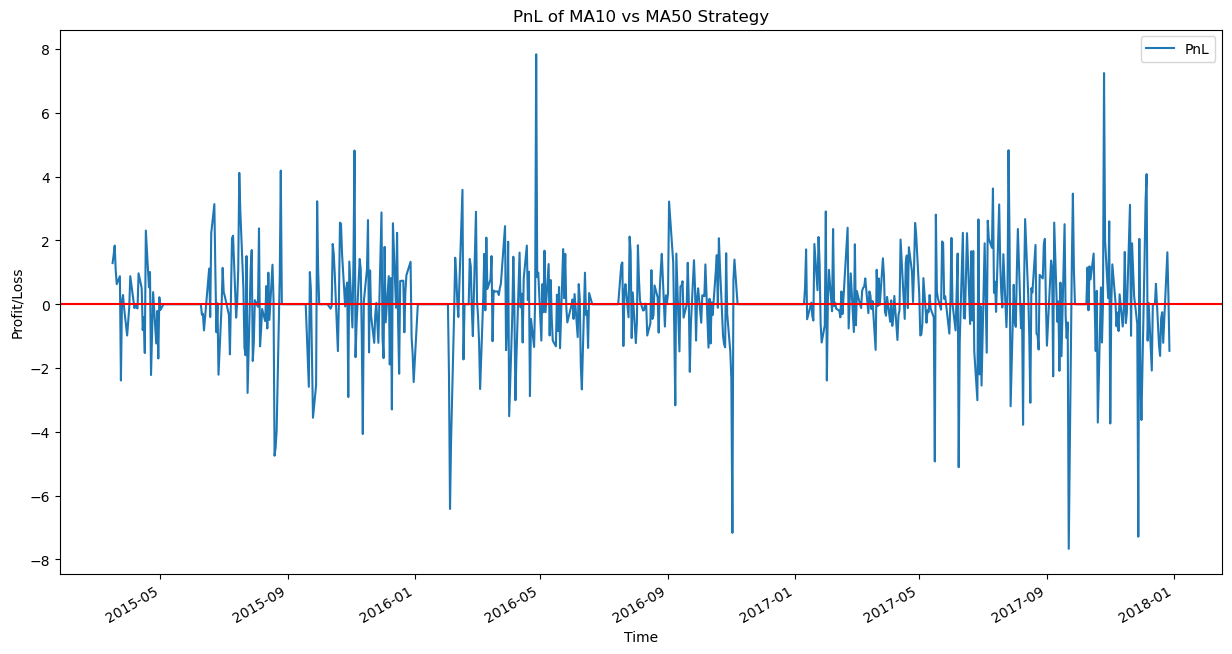

In [28]:
#Plot a graph to show the Profit/Loss
plt.figure(figsize=(15,8))
fb['Profit'].plot(label='PnL')
plt.xlabel('Time')
plt.ylabel('Profit/Loss')
plt.title('PnL of MA10 vs MA50 Strategy')
plt.axhline(y=0, color='red')
plt.legend()
plt.show()

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [29]:
fb['Wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Profit,Wealth
Date,,,,,,,,,,,
2017-12-22,177.139999,177.529999,176.229996,177.199997,177.012192,8509500,178.573999,177.7204,1,-1.209991,54.420013
2017-12-26,176.630005,177.000000,174.669998,175.990005,175.803482,8897300,178.269000,177.7654,1,1.629990,56.050003
2017-12-27,176.550003,178.440002,176.259995,177.619995,177.431732,9496100,178.334999,177.8274,1,0.300003,56.350006
2017-12-28,177.949997,178.940002,177.679993,177.919998,177.731430,12220800,178.296999,177.8636,1,-1.459991,54.890015
2017-12-29,178.000000,178.850006,176.460007,176.460007,176.272980,10261500,178.103999,177.8722,1,NaN,NaN


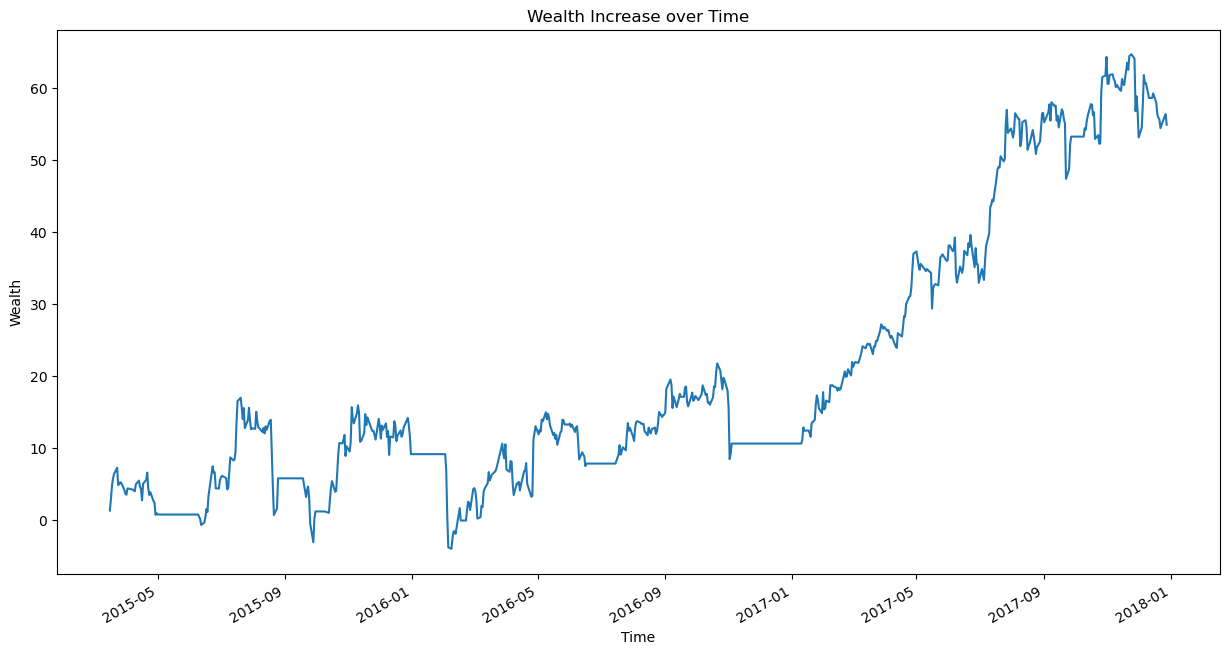

In [30]:
#plot the wealth to show the growth of profit over the period
plt.figure(figsize=(15,8))
fb['Wealth'].plot()
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.title('Wealth Increase over Time')
plt.show()

In [31]:
portfolio_return = (fb['Wealth'].iloc[-2] - fb['Wealth'].iloc[0]) / fb['Wealth'].iloc[0]
print('Portfolio return is {} %'.format(portfolio_return))

Portfolio return is 41.550368753807305 %
